In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

%matplotlib inline


In [2]:
# Import dataset and combine

df1 = pd.read_csv("C:/Users/Ritesh B/Downloads/covid_impact_survey1.csv", low_memory = False)
df2 = pd.read_csv("C:/Users/Ritesh B/Downloads/covid_impact_survey2.csv", low_memory = False)
df3 = pd.read_csv("C:/Users/Ritesh B/Downloads/covid_impact_survey3.csv", low_memory = False)

In [3]:
frames = [df1, df2, df3]

df = pd.concat(frames)

In [4]:
df.shape

(25269, 178)

In [5]:
for col in df:
    print(col)

Unnamed: 0
SU_ID
P_PANEL
NATIONAL_WEIGHT
REGION_WEIGHT
NATIONAL_WEIGHT_POP
REGION_WEIGHT_POP
P_GEO
SOC1
SOC2A
SOC2B
SOC3A
SOC3B
SOC4A
SOC4B
PHYS8
PHYS1A
PHYS1B
PHYS1C
PHYS1D
PHYS1E
PHYS1F
PHYS1G
PHYS1H
PHYS1I
PHYS1J
PHYS1K
PHYS1L
PHYS1M
PHYS1N
PHYS1O
PHYS1P
PHYS1Q
SOC5A
SOC5B
SOC5C
SOC5D
SOC5E
PHYS2_1
PHYS2_2
PHYS2_3
PHYS2_4
PHYS2_5
PHYS2_6
PHYS2_7
PHYS2_8
PHYS2_9
PHYS2_10
PHYS2_11
PHYS2_12
PHYS2_13
PHYS2_14
PHYS2_15
PHYS2_16
PHYS2_17
PHYS2_18
PHYS2_19
PHYS2_DK
PHYS2_SKP
PHYS2_REF
PHYS10A
PHYS10B
PHYS10C
PHYS10D
PHYS10E
ECON8A
ECON8B
ECON8C
ECON8D
ECON8E
ECON8F
ECON8G
ECON8H
ECON8I
ECON8J
ECON8K
ECON8L
ECON8M
ECON8N
ECON8O
ECON8P
ECON8Q
ECON8R
ECON8S
ECON7_1
ECON7_2
ECON7_3
ECON7_4
ECON7_5
ECON7_6
ECON7_7
ECON7_8
ECON7_DK
ECON7_SKP
ECON7_REF
ECON1
ECON2
ECON4
ECON3
ECON4A
ECON4B
ECON6A
ECON6B
ECON6C
ECON6D
ECON6E
ECON6F
ECON6G
ECON6H
ECON6I
ECON6J
ECON6K
ECON6L
ECON5A_A
ECON5A_B
PHYS7_1
PHYS7_2
PHYS7_3
PHYS7_4
PHYS7_DK
PHYS7_SKP
PHYS7_REF
PHYS11
PHYS11_TEMP
PHYS9A
PHYS9B
PHYS9C
PHYS9D


In [6]:
#Based on DF column analysis, below columns do not have proper values or not useful for model.
exclude_columns_lst = ["P_PANEL","NATIONAL_WEIGHT","REGION_WEIGHT","NATIONAL_WEIGHT_POP","REGION_WEIGHT_POP","PHYS10A","PHYS10B","PHYS10C",
"PHYS10D","PHYS10E","ECON8A","ECON8B","ECON8C","ECON8D","ECON8E","ECON8F","ECON8G","ECON8H","ECON8I","ECON8J","ECON8K","ECON8L",
"ECON8M","ECON8N","ECON8O","ECON8P","ECON8Q","ECON8R","ECON8S","ECON7_1","ECON7_2","ECON7_3","ECON7_4","ECON7_5","ECON7_6",
"ECON7_7","ECON7_8","ECON7_DK","ECON7_SKP","ECON7_REF","ECON1","ECON2","ECON4","ECON6A","ECON6B","ECON6C","ECON6D","ECON6E",
"ECON6F","ECON6G","ECON6H","ECON6I","ECON6J","ECON6K","ECON6L","ECON5A_B","PHYS7_DK","PHYS7_SKP","PHYS7_REF","PHYS9A","PHYS9B",
"PHYS9C","PHYS9D","PHYS9E","PHYS9F","PHYS9G","PHYS9H","REGION4","REGION9","MODE","LANGUAGE","MAIL50","HH_BANNER","Unnamed: 0","SU_ID"]

In [7]:
#Dropping the columns that were identified for exclusion
for exclcol in exclude_columns_lst:
    del df[exclcol]

In [8]:
# Checking the missing values in dataset, sort by percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                       column_name  percent_missing
PHYS2_SKP                PHYS2_SKP         0.000000
PHYS3E                      PHYS3E         0.000000
PHYS3D                      PHYS3D         0.000000
PHYS3C                      PHYS3C         0.000000
PHYS3B                      PHYS3B         0.000000
...                            ...              ...
RACE2_BANNER          RACE2_BANNER        91.333254
P_OCCUPY2                P_OCCUPY2        94.253829
MARITAL                    MARITAL       100.000000
NAT_WGT_COMB_POP  NAT_WGT_COMB_POP       100.000000
LGBT                          LGBT       100.000000

[103 rows x 2 columns]


In [9]:
#Remove missing values with over 20% missing values
missing_value_collst = ["PHYS11_TEMP","RACE2_BANNER","REG_WGT_COMB_POP","P_OCCUPY2","LGBT","NAT_WGT_COMB_POP","MARITAL" ]
for mvcol in missing_value_collst:
    del df[mvcol]

In [10]:
df.head(10)

,P_GEO,SOC1,SOC2A,SOC2B,SOC3A,SOC3B,SOC4A,SOC4B,PHYS8,PHYS1A,...,HHSIZE1,HH01S,HH25S,HH612S,HH1317S,HH18OVS,P_DENSE,RACE1_BANNER,INC_BANNER,AGE_BANNER
0,New York,(3) Some,(4) Once a month,(4) Once a month,(1) Basically every day,(1) Basically every day,(2) No,(2) No,(3) Good,(1) Yes,...,(4) Four persons,0,1,0,2,1,(3) Urban,(1) NH white 5,"(1) Less than $30,000",(2) 23-64
1,"Phoenix-Mesa-Chandler, Arizona",(3) Some,(3) A few times a month,(3) A few times a month,(1) Basically every day,(3) A few times a month,(2) No,(2) No,(2) Very good,(2) No,...,(2) Two persons,0,0,0,0,2,(3) Urban,(1) NH white 5,(4) More than $125k,(3) 65+
2,Oregon,(3) Some,(3) A few times a month,(3) A few times a month,(1) Basically every day,(1) Basically every day,(2) No,(1) Yes,(2) Very good,(2) No,...,(2) Two persons,0,0,0,0,2,(3) Urban,(88) Removed for disclosure risk,(4) More than $125k,(3) 65+
3,"Pittsburgh, Pennsylvania",(3) Some,(2) A few times a week,(2) A few times a week,(1) Basically every day,(1) Basically every day,(2) No,(1) Yes,(3) Good,(2) No,...,(2) Two persons,0,0,0,0,2,(3) Urban,(2) NH black 5,(3) $60k to less than $125k,(3) 65+
4,"Cleveland-Elyria, Ohio",(3) Some,(1) Basically every day,(1) Basically every day,(1) Basically every day,(1) Basically every day,(2) No,(2) No,(3) Good,(1) Yes,...,(2) Two persons,0,0,0,0,2,(3) Urban,(1) NH white 5,(3) $60k to less than $125k,(3) 65+
5,"Pittsburgh, Pennsylvania",(2) Most,(3) A few times a month,(3) A few times a month,(1) Basically every day,(1) Basically every day,(1) Yes,(1) Yes,(2) Very good,(2) No,...,(2) Two persons,0,0,0,0,2,(3) Urban,(1) NH white 5,(3) $60k to less than $125k,(2) 23-64
6,Florida,(2) Most,(4) Once a month,(3) A few times a month,(1) Basically every day,(1) Basically every day,(2) No,(2) No,(98) SKIPPED ON WEB,(1) Yes,...,(4) Four persons,0,0,0,0,4,(3) Urban,(3) Hispanic 5,"(1) Less than $30,000",(2) 23-64
7,"Chicago-Naperville-Elgin, Illinois-Indiana-Wis...",(3) Some,(3) A few times a month,(3) A few times a month,(1) Basically every day,(2) A few times a week,(2) No,(2) No,(3) Good,(2) No,...,(2) Two persons,0,0,0,0,2,(3) Urban,(1) NH white 5,(4) More than $125k,(2) 23-64
8,"Cleveland-Elyria, Ohio",(1) All,(4) Once a month,(5) Not at all,(3) A few times a month,(3) A few times a month,(2) No,(2) No,(1) Excellent,(2) No,...,"(1) One person, I live by myself",0,0,0,0,1,(3) Urban,(2) NH black 5,"(1) Less than $30,000",(2) 23-64
9,Montana,(3) Some,(4) Once a month,(3) A few times a month,(3) A few times a month,(4) Once a month,(1) Yes,(2) No,(2) Very good,(2) No,...,(3) Three persons,0,0,1,0,2,(2) Suburban,(88) Removed for disclosure risk,(3) $60k to less than $125k,(2) 23-64


In [11]:
df.shape

(25269, 96)

In [12]:
# Checking the missing values in dataset, sort by percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

               column_name  percent_missing
PHYS2_17          PHYS2_17         0.000000
PHYS3F              PHYS3F         0.000000
PHYS3E              PHYS3E         0.000000
PHYS3D              PHYS3D         0.000000
PHYS3C              PHYS3C         0.000000
...                    ...              ...
SOC2A                SOC2A         0.003957
P_DENSE            P_DENSE         0.019787
RACE1_BANNER  RACE1_BANNER         0.126637
INC_BANNER      INC_BANNER         2.453599
P_GEO                P_GEO        17.012941

[96 rows x 2 columns]


In [13]:
# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    # 2. Take most occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]
    print(Mode_Category)
    ## 2.1 Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [14]:
impute_nan_add_vairable(df,"P_GEO")
impute_nan_add_vairable(df,"INC_BANNER")
impute_nan_add_vairable(df,"RACE1_BANNER")
impute_nan_add_vairable(df,"P_DENSE")
impute_nan_add_vairable(df,"SOC2A")

California
(3) $60k to less than $125k
(1) NH white 5
(3) Urban
(2) A few times a week


In [15]:
df.loc[df['P_GEO']=='California'].count()

P_GEO                   6128
SOC1                    6128
SOC2A                   6128
SOC2B                   6128
SOC3A                   6128
                        ... 
P_GEO_Imputed           6128
INC_BANNER_Imputed      6128
RACE1_BANNER_Imputed    6128
P_DENSE_Imputed         6128
SOC2A_Imputed           6128
Length: 101, dtype: int64

In [16]:
# Checking the missing values in dataset, sort by percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                 column_name  percent_missing
P_GEO                  P_GEO              0.0
PHYS3K                PHYS3K              0.0
PHYS3J                PHYS3J              0.0
PHYS3I                PHYS3I              0.0
PHYS3H                PHYS3H              0.0
...                      ...              ...
SOC5C                  SOC5C              0.0
SOC5B                  SOC5B              0.0
SOC5A                  SOC5A              0.0
PHYS2_6              PHYS2_6              0.0
SOC2A_Imputed  SOC2A_Imputed              0.0

[101 rows x 2 columns]


In [17]:
#drop imputed column flags
for imo_col in ["P_GEO_Imputed","INC_BANNER_Imputed","RACE1_BANNER_Imputed","P_DENSE_Imputed","SOC2A_Imputed"]:
    del df[imo_col]


In [18]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25269 entries, 0 to 7504
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   P_GEO         25269 non-null  object
 1   SOC1          25269 non-null  object
 2   SOC2A         25269 non-null  object
 3   SOC2B         25269 non-null  object
 4   SOC3A         25269 non-null  object
 5   SOC3B         25269 non-null  object
 6   SOC4A         25269 non-null  object
 7   SOC4B         25269 non-null  object
 8   PHYS8         25269 non-null  object
 9   PHYS1A        25269 non-null  object
 10  PHYS1B        25269 non-null  object
 11  PHYS1C        25269 non-null  object
 12  PHYS1D        25269 non-null  object
 13  PHYS1E        25269 non-null  object
 14  PHYS1F        25269 non-null  object
 15  PHYS1G        25269 non-null  object
 16  PHYS1H        25269 non-null  object
 17  PHYS1I        25269 non-null  object
 18  PHYS1J        25269 non-null  object
 19  PHYS1

In [19]:

df.shape

(25269, 96)

In [20]:
# Converting SOC5B (Target Variable) to 0 - Not Depressed or 1 = Depressed
df.loc[df["SOC5B"] == "(1) Not at all or less than 1 day", "SOC5B"] = 0
df.loc[df["SOC5B"] == "(98) SKIPPED ON WEB","SOC5B"] = 0
df.loc[df["SOC5B"] == "(99) REFUSED", "SOC5B"] = 0
df.loc[df["SOC5B"] == "(77) DON'T KNOW","SOC5B"] = 0
df.loc[df["SOC5B"] == "(2) 1-2 days", "SOC5B"] = 1
df.loc[df["SOC5B"] == "(3) 3-4 days", "SOC5B"] = 1
df.loc[df["SOC5B"] == "(4) 5-7 days", "SOC5B"] = 1

In [21]:
# split data into features (X) and target (y)
X = df.drop("SOC5B", axis=1)
y = df["SOC5B"]

In [22]:
pip uninstall category-encoders

Note: you may need to restart the kernel to use updated packages.


In [23]:
conda install -c conda-forge category_encoders


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: category_encoders


In [26]:
#encoding the categorical column to prepare for model
import category_encoders as ce
for col in X:
      if df[col].dtypes == "object" :
            print("Encoding Completed for ",col)
            encoder = ce.OneHotEncoder(cols=col,handle_unknown='return_nan',return_df=True,use_cat_names=True)
            X = encoder.fit_transform(X)

Encoding Completed for  P_GEO
Encoding Completed for  SOC1
Encoding Completed for  SOC2A
Encoding Completed for  SOC2B
Encoding Completed for  SOC3A
Encoding Completed for  SOC3B
Encoding Completed for  SOC4A
Encoding Completed for  SOC4B
Encoding Completed for  PHYS8
Encoding Completed for  PHYS1A
Encoding Completed for  PHYS1B
Encoding Completed for  PHYS1C
Encoding Completed for  PHYS1D
Encoding Completed for  PHYS1E
Encoding Completed for  PHYS1F
Encoding Completed for  PHYS1G
Encoding Completed for  PHYS1H
Encoding Completed for  PHYS1I
Encoding Completed for  PHYS1J
Encoding Completed for  PHYS1K
Encoding Completed for  PHYS1L
Encoding Completed for  PHYS1M
Encoding Completed for  PHYS1N
Encoding Completed for  PHYS1O
Encoding Completed for  PHYS1P
Encoding Completed for  PHYS1Q
Encoding Completed for  SOC5A
Encoding Completed for  SOC5C
Encoding Completed for  SOC5D
Encoding Completed for  SOC5E
Encoding Completed for  PHYS2_1
Encoding Completed for  PHYS2_2
Encoding Completed f

<AxesSubplot:>

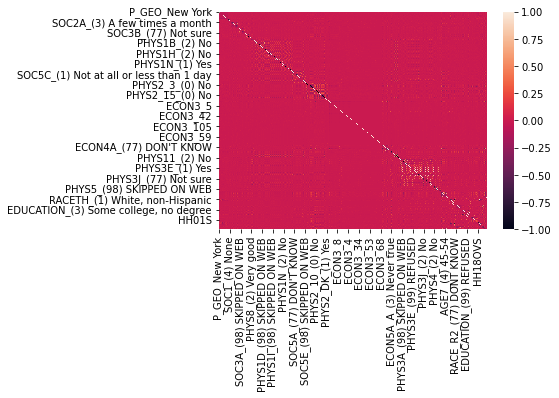

In [27]:
#Correlation matrix- Not much correlation within the independent variables.note yellow dotsbkrix
sns.heatmap(X.corr())

In [ ]:
###########################################################################

In [105]:
# Heatmap with correlation 
fig = plt.figure(figsize = (10,10))
plot = sns.heatmap(X.corr(), cmap="YlOrRd", annot = True)

Error in callback <function flush_figures at 0x0000021AB2BA8790> (for post_execute):



KeyboardInterrupt



<AxesSubplot:>

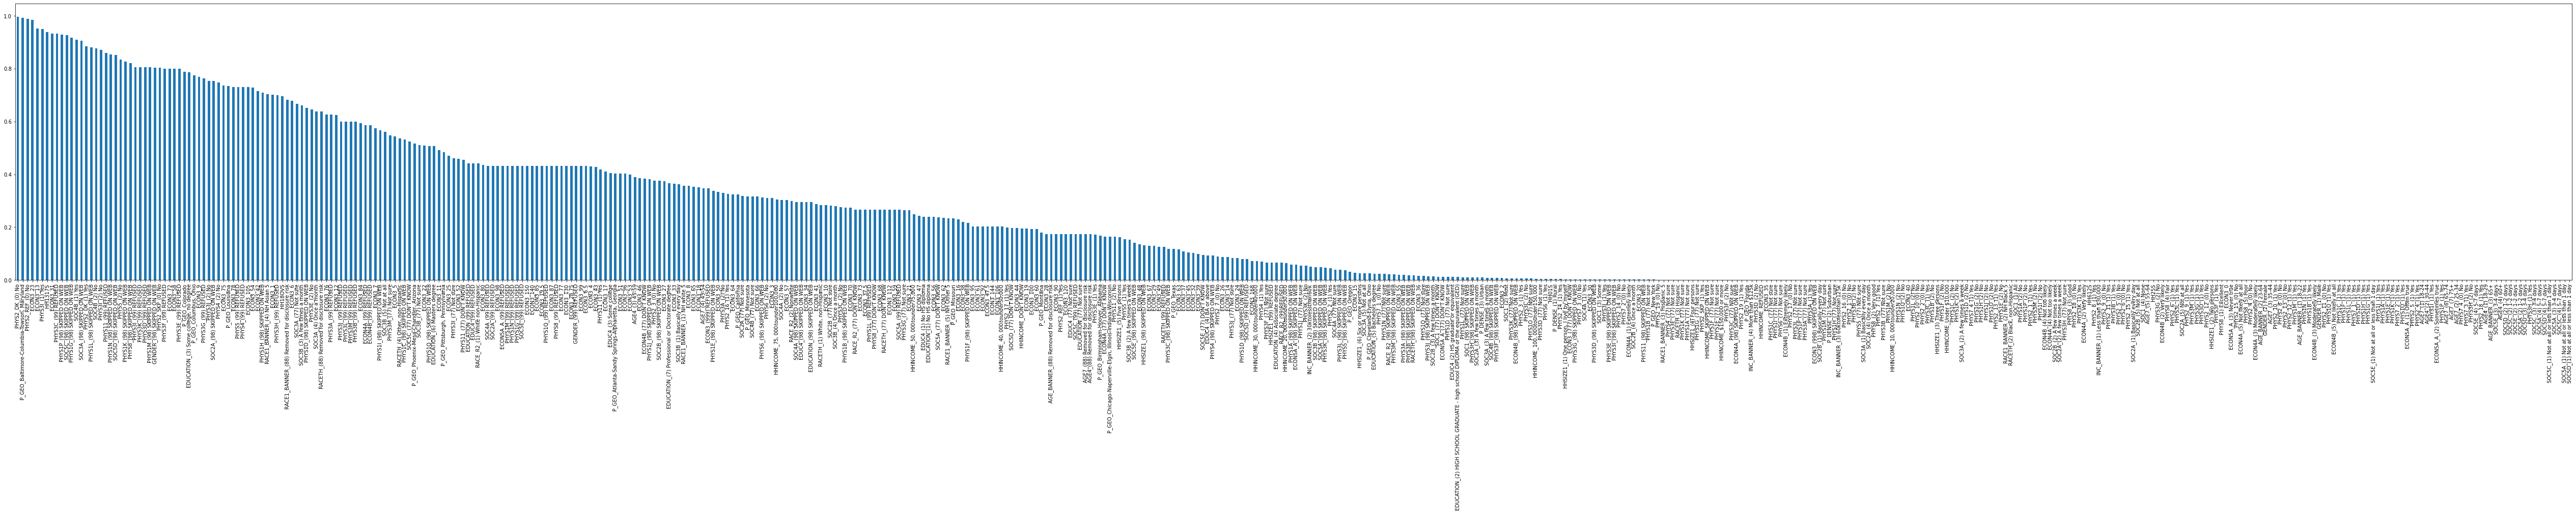

In [103]:
#Chi Square Test - features independent of the dependent variable and do not help the model.
#There are many columns that have no correlation with the target value and hence can be removed.
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y.astype('int'))
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar(figsize =(90,10))

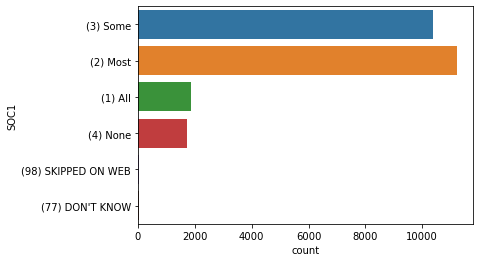

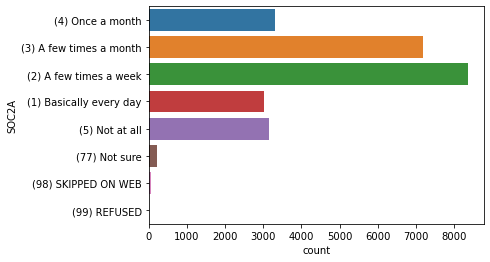

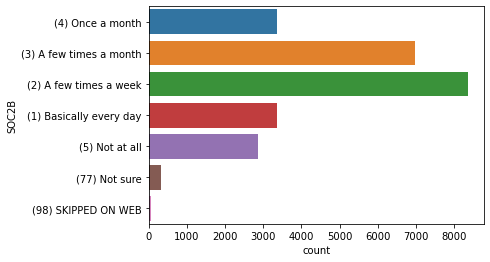

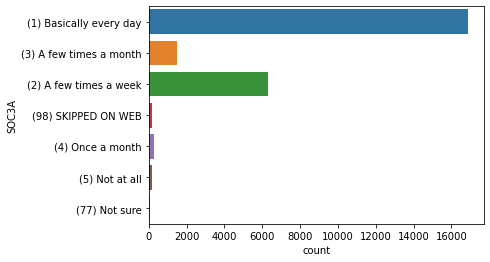

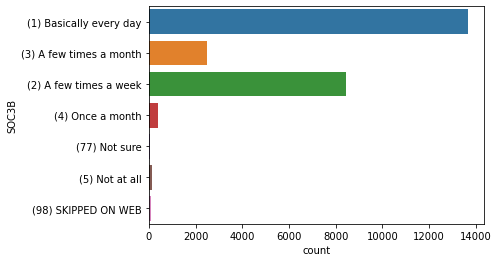

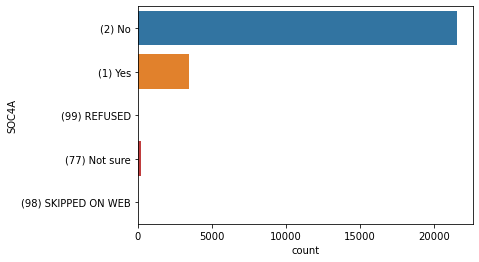

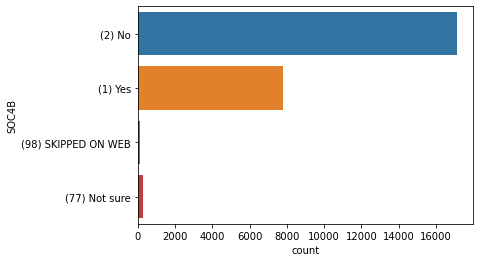

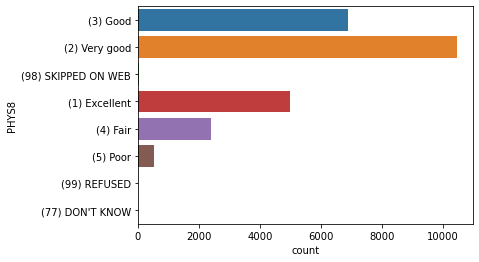

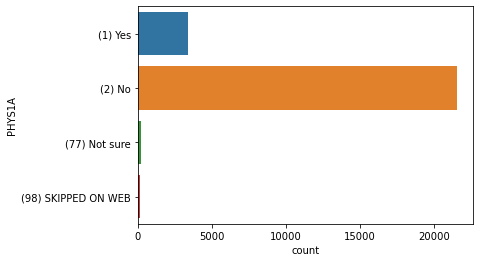

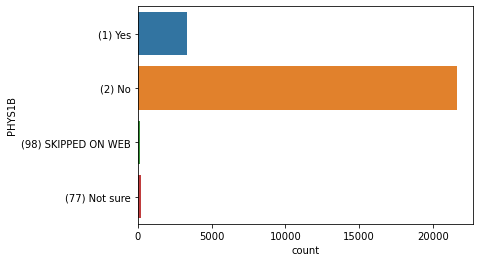

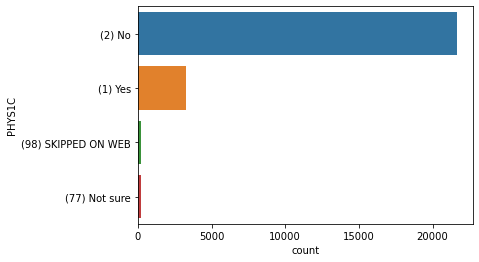

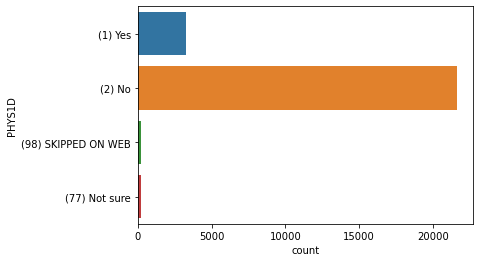

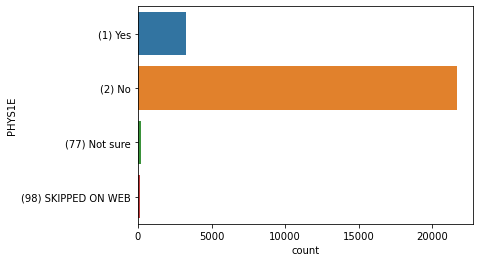

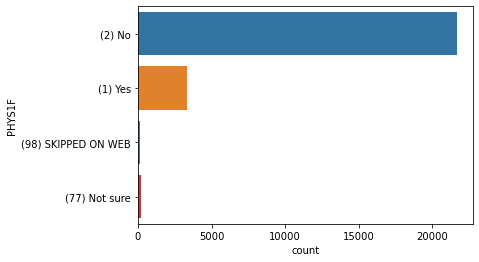

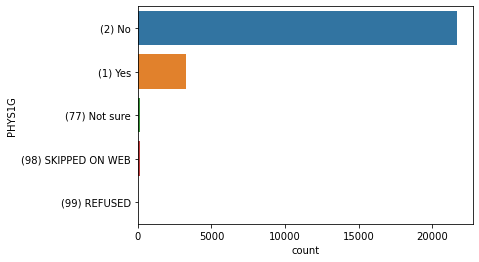

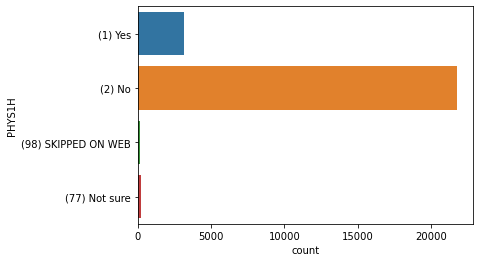

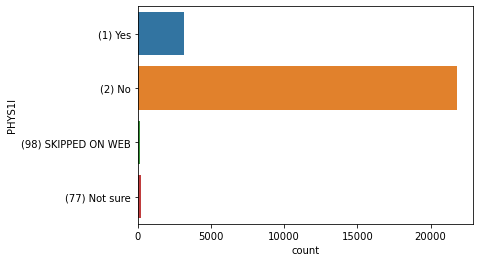

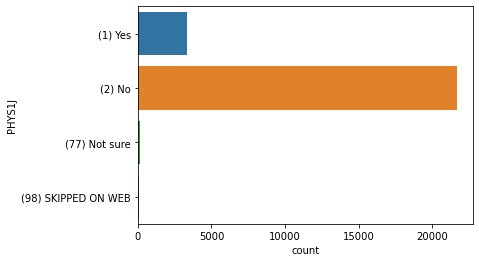

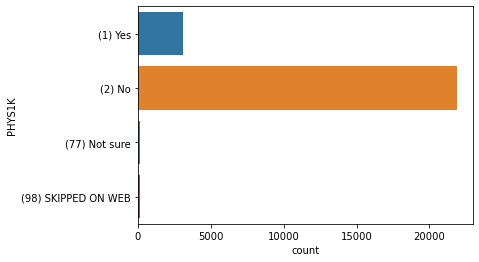

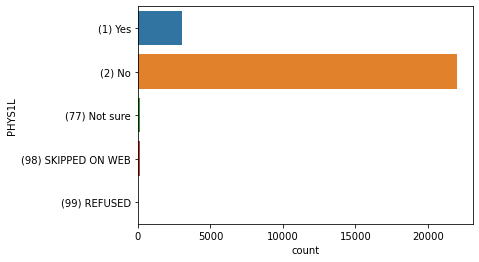

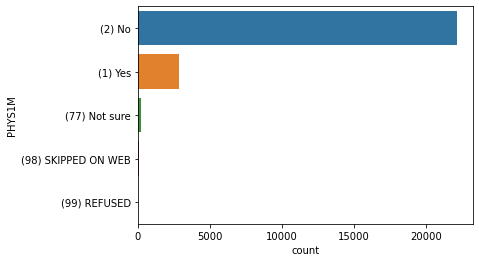

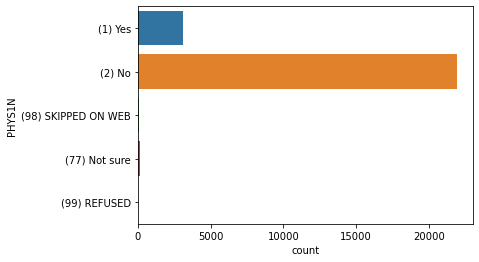

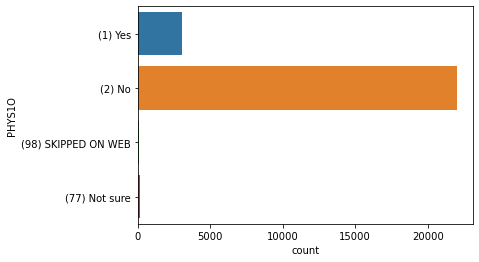

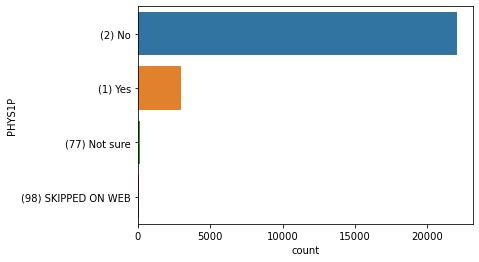

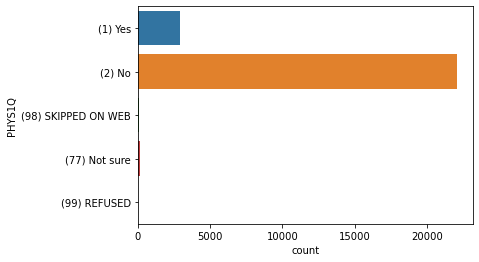

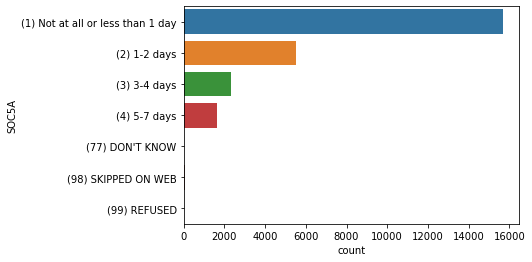

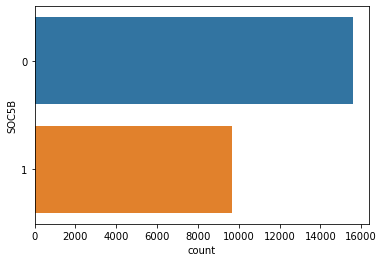

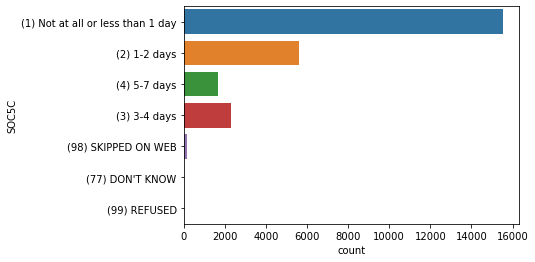

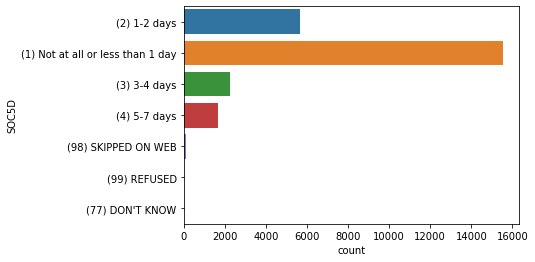

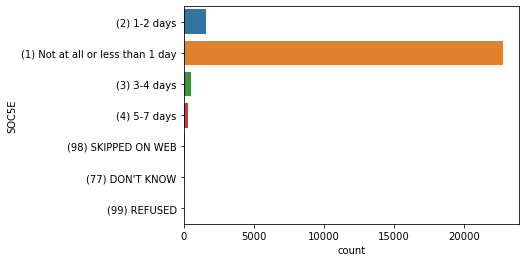

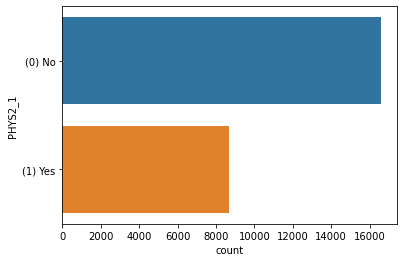

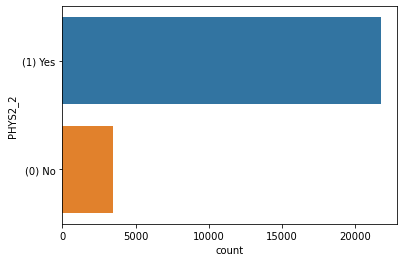

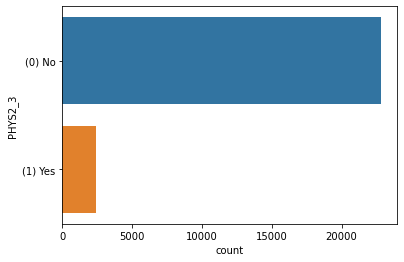

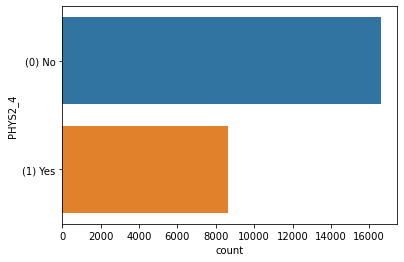

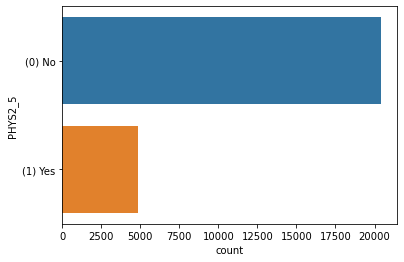

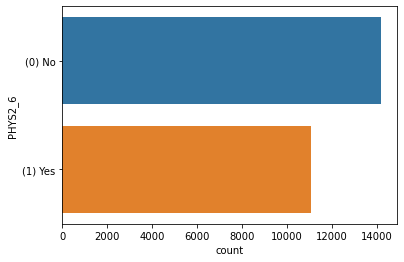

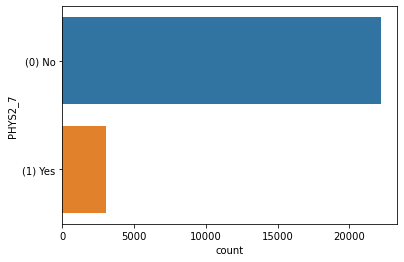

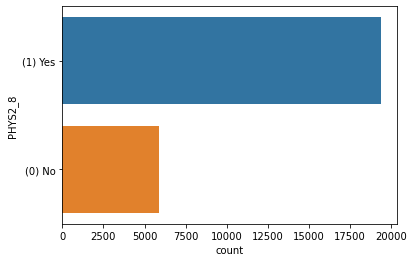

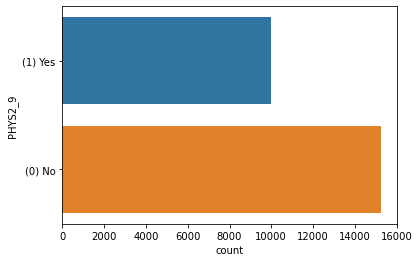

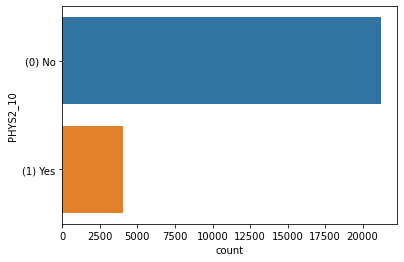

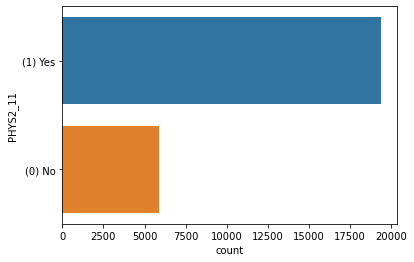

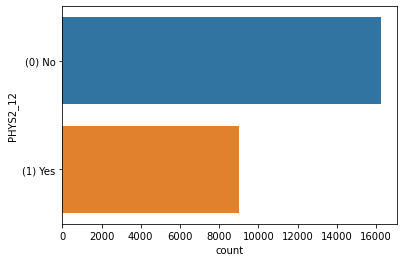

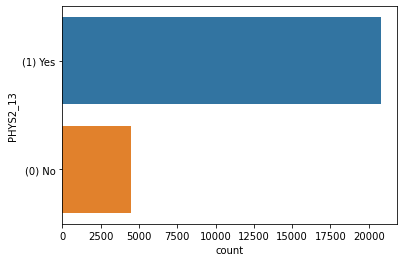

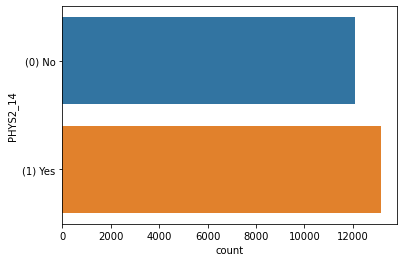

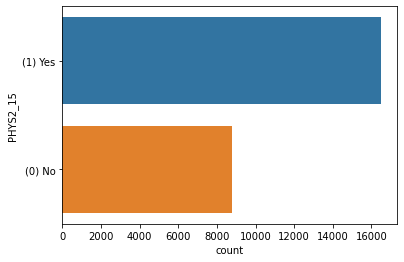

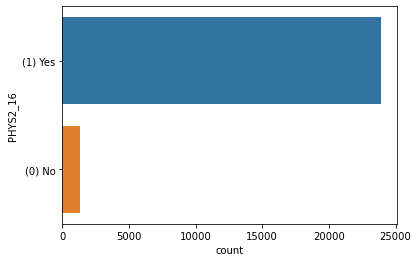

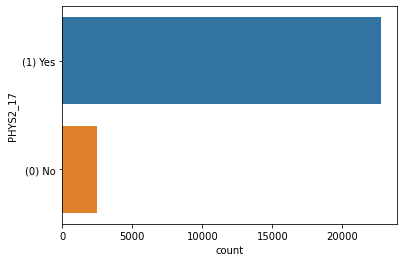

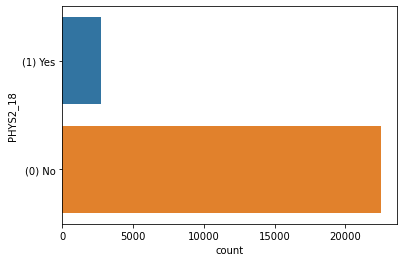

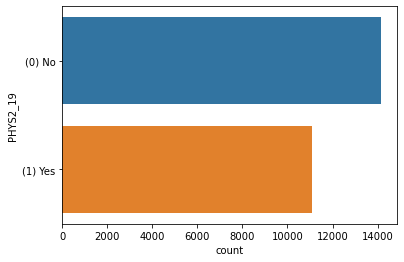

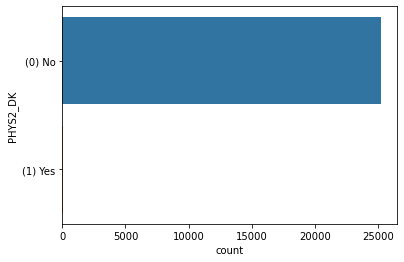

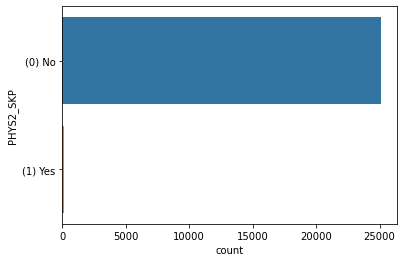

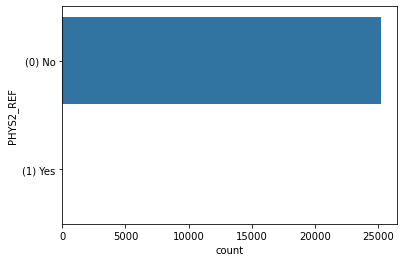

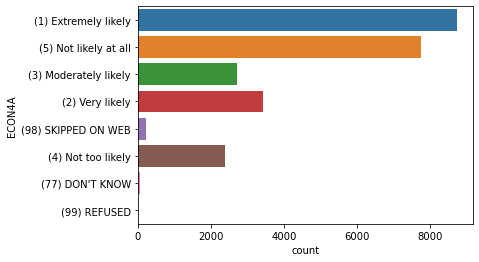

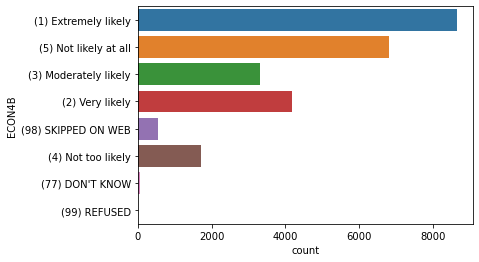

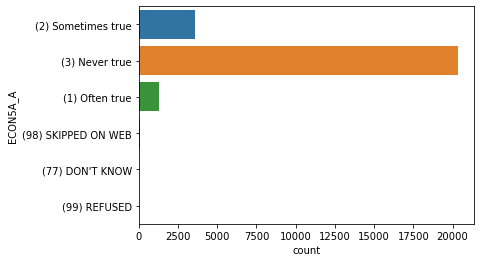

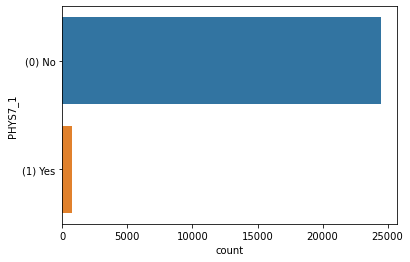

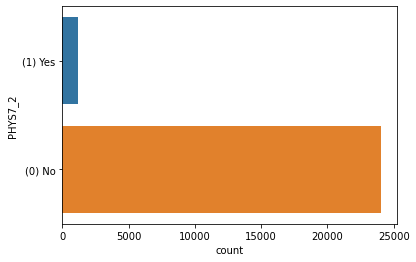

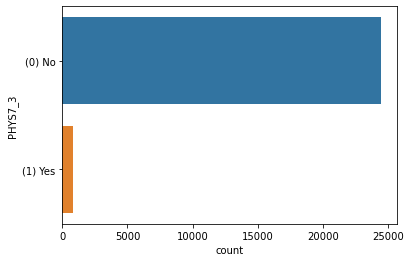

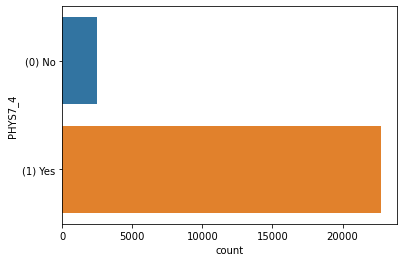

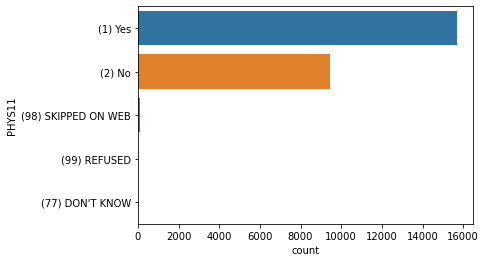

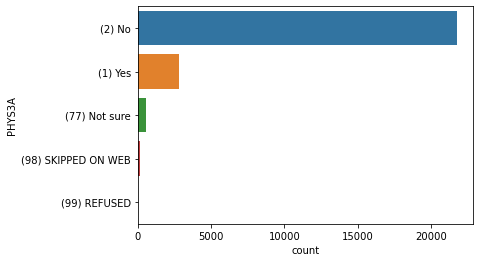

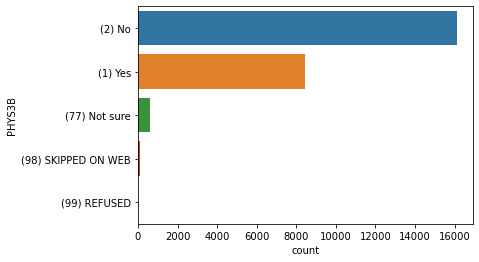

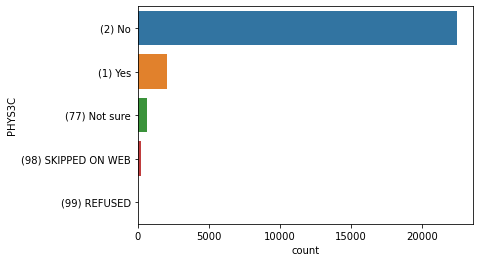

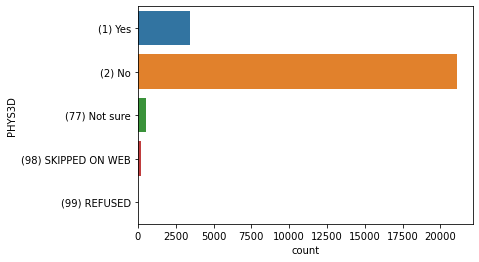

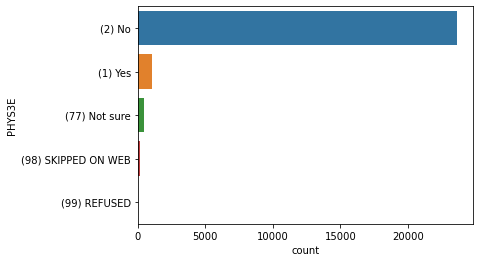

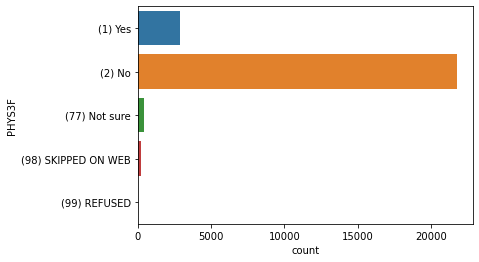

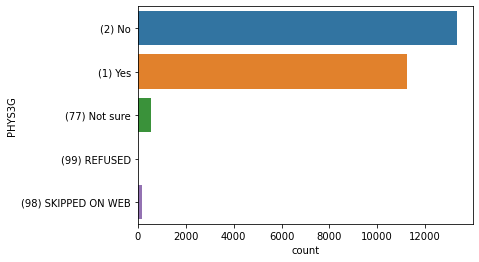

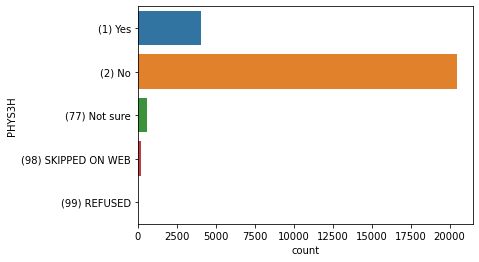

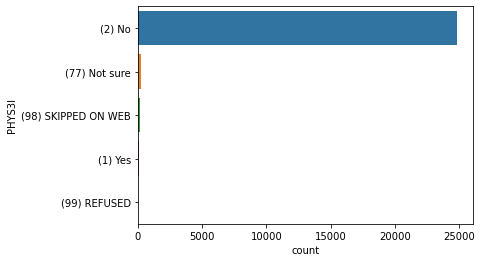

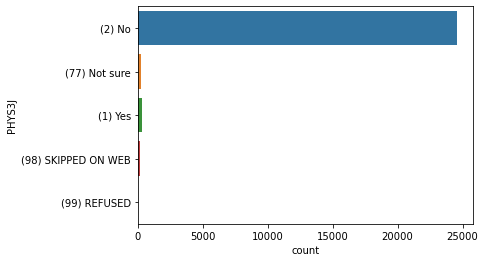

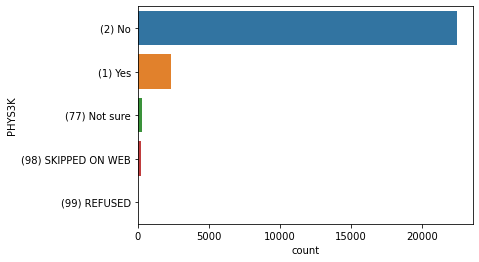

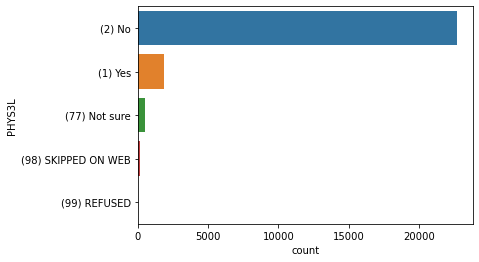

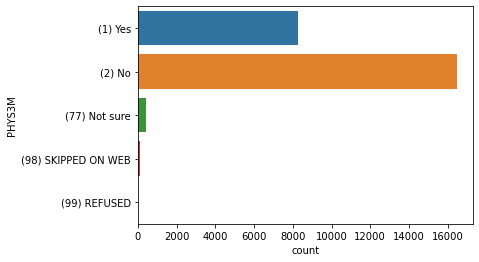

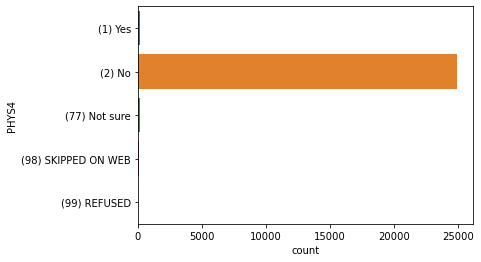

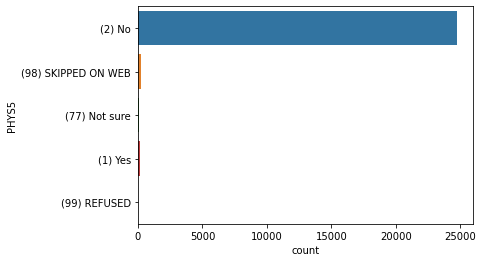

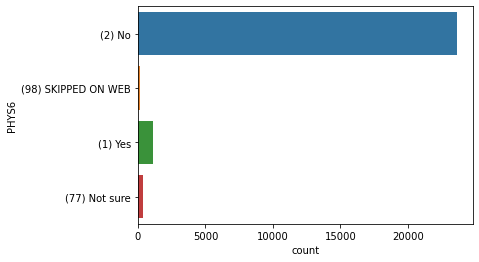

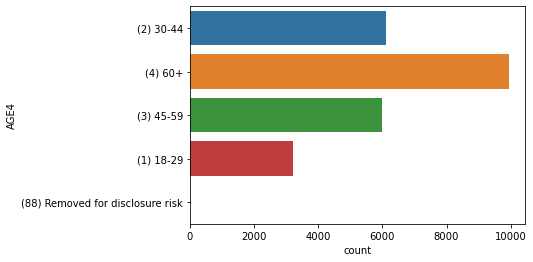

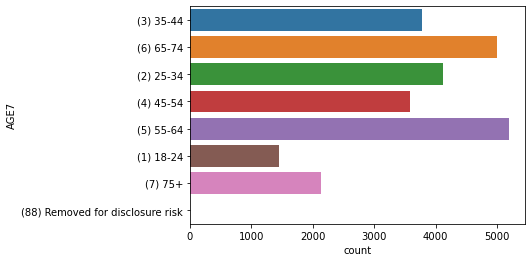

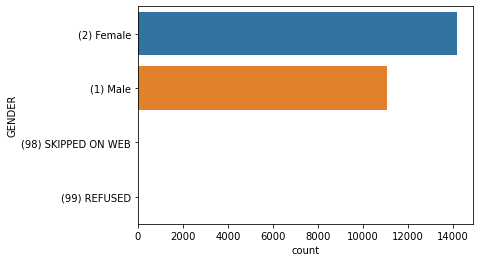

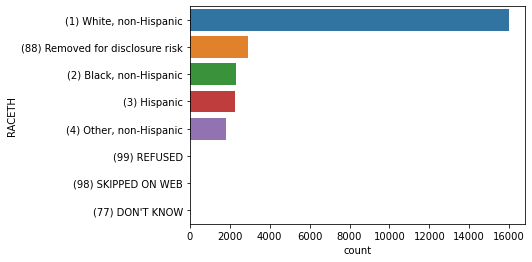

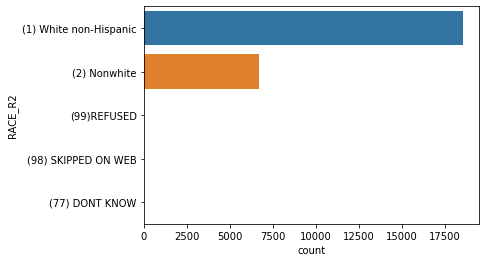

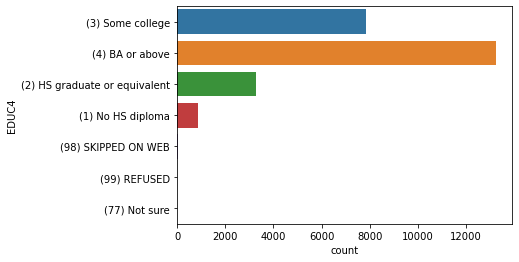

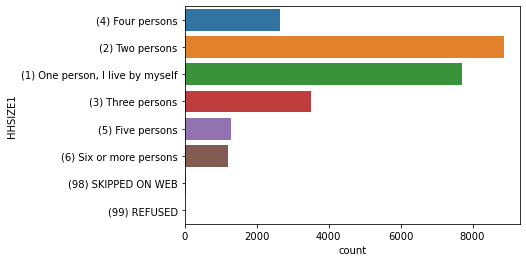

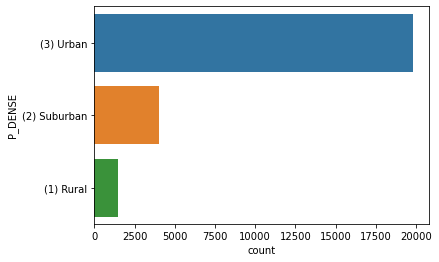

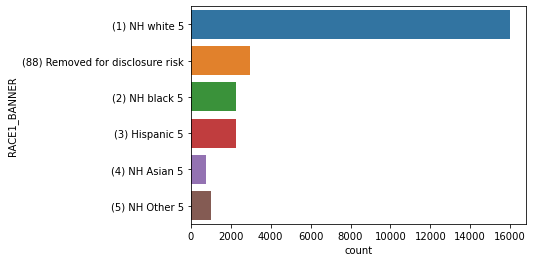

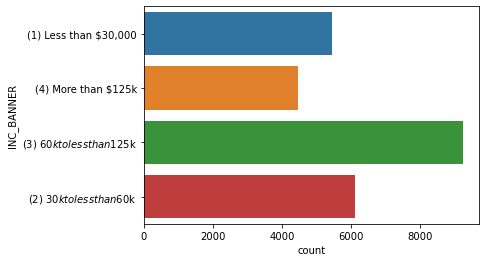

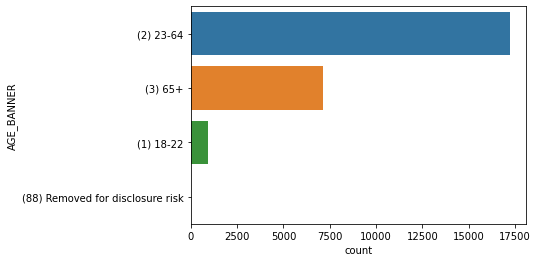

In [66]:
#Distribution of values within the survey questions.
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

In [112]:
#Boxplot of the integer variables.
for col in df:
      #print(df[col].dtypes)
    if df[col].dtypes == "int64" :
        print("Boxplot of",col)
        boxplot_col.append(col)
        sns.boxplot(data=df, x=col, color='green')
        plt.show()         

Boxplot of HH01S


NameError: name 'boxplot_col' is not defined

In [ ]:
#Helps to understand correlation of survey responses to the target Variable
for column in df.select_dtypes(include='object'):
    CrosstabResult=pd.crosstab(index=df[column],columns=df['SOC5B'])
    print(CrosstabResult)

In [78]:
p_values.values

array([9.97199069e-001, 9.93346695e-001, 9.88162756e-001, 9.84103213e-001,
       9.51548026e-001, 9.49853804e-001, 9.38592829e-001, 9.33723167e-001,
       9.33723167e-001, 9.28898020e-001, 9.26580111e-001, 9.16509047e-001,
       9.08854266e-001, 9.05548248e-001, 8.85469000e-001, 8.80008255e-001,
       8.76108352e-001, 8.70740289e-001, 8.59816191e-001, 8.53825122e-001,
       8.52648474e-001, 8.33783008e-001, 8.26246222e-001, 8.21444963e-001,
       8.06452482e-001, 8.06452482e-001, 8.06452482e-001, 8.06028281e-001,
       8.04394515e-001, 8.04262855e-001, 7.99508053e-001, 7.99508053e-001,
       7.99508053e-001, 7.99508053e-001, 7.88194007e-001, 7.85780430e-001,
       7.74212818e-001, 7.68829484e-001, 7.64124723e-001, 7.54306648e-001,
       7.52752346e-001, 7.47459132e-001, 7.36390018e-001, 7.34718839e-001,
       7.31094148e-001, 7.31094148e-001, 7.31094148e-001, 7.31094148e-001,
       7.28974847e-001, 7.15915625e-001, 7.09680751e-001, 7.04375642e-001,
       7.01840284e-001, 6

In [74]:
X.corr()

,P_GEO_New York,"P_GEO_Phoenix-Mesa-Chandler, Arizona",P_GEO_Oregon,"P_GEO_Pittsburgh, Pennsylvania","P_GEO_Cleveland-Elyria, Ohio",P_GEO_Florida,"P_GEO_Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin",P_GEO_Montana,P_GEO_Louisiana,P_GEO_Colorado,...,RACE1_BANNER_(4) NH Asian 5,RACE1_BANNER_(5) NH Other 5,"INC_BANNER_(1) Less than $30,000",INC_BANNER_(4) More than $125k,INC_BANNER_(3) $60k to less than $125k,INC_BANNER_(2) $30k to less than $60k,AGE_BANNER_(2) 23-64,AGE_BANNER_(3) 65+,AGE_BANNER_(1) 18-22,AGE_BANNER_(88) Removed for disclosure risk
P_GEO_New York,1.000000,-0.044066,-0.053101,-0.050185,-0.048806,-0.056963,-0.052876,-0.049046,-0.046800,-0.051878,...,0.025694,0.002737,-0.006332,0.018007,-0.001538,-0.008227,0.002221,-0.002066,-0.000413,-0.002543
"P_GEO_Phoenix-Mesa-Chandler, Arizona",-0.044066,1.000000,-0.042969,-0.040609,-0.039493,-0.046094,-0.042787,-0.039688,-0.037869,-0.041979,...,0.002782,0.003694,-0.019370,0.000724,0.013928,0.002297,-0.044630,0.043303,0.007087,-0.002058
P_GEO_Oregon,-0.053101,-0.042969,1.000000,-0.048936,-0.047591,-0.055546,-0.051560,-0.047826,-0.045635,-0.050586,...,-0.024673,-0.025786,-0.011296,0.006324,0.009936,-0.005956,-0.032838,0.036977,-0.007167,-0.002480
"P_GEO_Pittsburgh, Pennsylvania",-0.050185,-0.040609,-0.048936,1.000000,-0.044978,-0.052495,-0.048729,-0.045199,-0.043129,-0.047808,...,-0.007123,0.000479,0.004679,-0.009779,0.001837,0.002148,-0.020293,0.025212,-0.010123,-0.002343
"P_GEO_Cleveland-Elyria, Ohio",-0.048806,-0.039493,-0.047591,-0.044978,1.000000,-0.051053,-0.047390,-0.043957,-0.041944,-0.046495,...,-0.016698,-0.008281,-0.004555,-0.009902,0.012221,-0.000549,-0.026954,0.032619,-0.012449,0.015848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC_BANNER_(2) $30k to less than $60k,-0.008227,0.002297,-0.005956,0.002148,-0.000549,0.022157,-0.021664,0.014871,-0.004483,-0.014344,...,-0.030070,-0.006430,-0.296301,-0.261705,-0.428865,1.000000,-0.042111,0.048529,-0.012214,0.002326
AGE_BANNER_(2) 23-64,0.002221,-0.044630,-0.032838,-0.020293,-0.026954,-0.020371,-0.006634,-0.019581,0.015985,-0.011568,...,0.054025,0.033365,-0.027240,0.081191,-0.003588,-0.042111,1.000000,-0.918565,-0.280879,-0.015935
AGE_BANNER_(3) 65+,-0.002066,0.043303,0.036977,0.025212,0.032619,0.019442,0.007290,0.020762,-0.017960,0.013409,...,-0.072788,-0.039031,-0.012059,-0.072383,0.024472,0.048529,-0.918565,1.000000,-0.120641,-0.006844
AGE_BANNER_(1) 18-22,-0.000413,0.007087,-0.007167,-0.010123,-0.012449,0.004122,-0.000894,-0.001095,0.002483,-0.003365,...,0.041210,0.011112,0.098180,-0.029044,-0.049994,-0.012214,-0.280879,-0.120641,1.000000,-0.002093


In [75]:
X.head()

,P_GEO_New York,"P_GEO_Phoenix-Mesa-Chandler, Arizona",P_GEO_Oregon,"P_GEO_Pittsburgh, Pennsylvania","P_GEO_Cleveland-Elyria, Ohio",P_GEO_Florida,"P_GEO_Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin",P_GEO_Montana,P_GEO_Louisiana,P_GEO_Colorado,...,RACE1_BANNER_(4) NH Asian 5,RACE1_BANNER_(5) NH Other 5,"INC_BANNER_(1) Less than $30,000",INC_BANNER_(4) More than $125k,INC_BANNER_(3) $60k to less than $125k,INC_BANNER_(2) $30k to less than $60k,AGE_BANNER_(2) 23-64,AGE_BANNER_(3) 65+,AGE_BANNER_(1) 18-22,AGE_BANNER_(88) Removed for disclosure risk
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [113]:
for col in X:
       print('"',col,'",')

" P_GEO_New York ",
" P_GEO_Phoenix-Mesa-Chandler, Arizona ",
" P_GEO_Oregon ",
" P_GEO_Pittsburgh, Pennsylvania ",
" P_GEO_Cleveland-Elyria, Ohio ",
" P_GEO_Florida ",
" P_GEO_Chicago-Naperville-Elgin, Illinois-Indiana-Wisconsin ",
" P_GEO_Montana ",
" P_GEO_Louisiana ",
" P_GEO_Colorado ",
" P_GEO_Texas ",
" P_GEO_Missouri ",
" P_GEO_Birmingham-Hoover, Alabama ",
" P_GEO_Columbus, Ohio ",
" P_GEO_Baltimore-Columbia-Towson, Maryland ",
" P_GEO_Atlanta-Sandy Springs-Alpharetta, Georgia ",
" P_GEO_California ",
" P_GEO_Minnesota ",
" SOC1_(3) Some ",
" SOC1_(2) Most ",
" SOC1_(1) All ",
" SOC1_(4) None ",
" SOC1_(98) SKIPPED ON WEB ",
" SOC1_(77) DON'T KNOW ",
" SOC2A_(4) Once a month ",
" SOC2A_(3) A few times a month ",
" SOC2A_(2) A few times a week ",
" SOC2A_(1) Basically every day ",
" SOC2A_(5) Not at all ",
" SOC2A_(77) Not sure ",
" SOC2A_(98) SKIPPED ON WEB ",
" SOC2A_(99) REFUSED ",
" SOC2B_(4) Once a month ",
" SOC2B_(3) A few times a month ",
" SOC2B_(2) A few times a week 

C:\Users\Ritesh B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


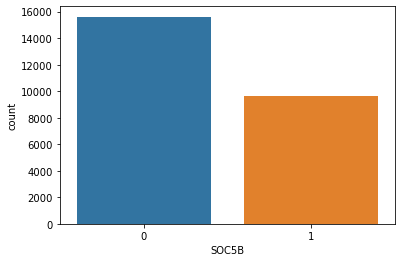

In [114]:
#Plot the Target Variable Class distribution
sns.countplot(y)
plt.show()

In [115]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (20215, 522)
Shape of testing feature: (5054, 522)
Shape of training label: (20215,)
Shape of training label: (5054,)


In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=600)
logreg.fit(X_train, y_train)
# Make prediction
y_pred = logreg.predict(X_test)

0.7754254056193114


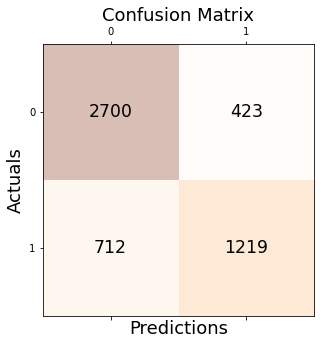

In [124]:
#Using accuracy_score function
print(accuracy_score(y_test, y_pred))
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [125]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Precision: 0.742
Recall: 0.631


In [127]:
pip install imblearn


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


C:\Users\Ritesh B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


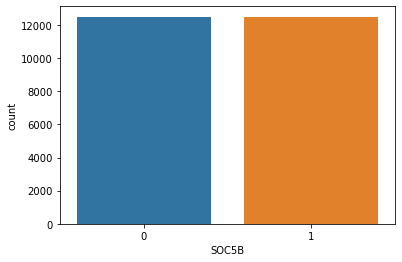

In [131]:
#Create an oversampled training data
#Balancing the Target variable Class
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
#Plot the Target Variable Class distribution
sns.countplot(y_oversample)
plt.show()

In [121]:
#Training with balanced data
from sklearn.metrics import classification_report
classifier = LogisticRegression(solver='lbfgs', max_iter=600)
classifier.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier.predict(X_test)))
#Using accuracy_score function
print(accuracy_score(y_test, y_pred))
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

NameError: name 'X_oversample' is not defined

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))